# The Winner Swimmer: Predicting Male Infertility through KNN Classifier
Prepared by: Manansala, Dorosan, Edeza, Gonzales, Licong, Marquez \
<img src="picture.png">

# Problem

For several decades, **Male fertility** rates have been declining. As Male infertility accounts for [40% of all infertility cases ](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4691969/) , this downward trend is quite worrying. Low fertility rates are usually associated with [diminished economic growth](https://www.nber.org/digest/jul09/w14820.html) particularly due to a decline in workers per capita. This decrease in labor supply would especially be felt in countries where the elderly are already retired and receive social security from the government.

The factors that determine fertility rates are varied, ranging from [culture, cost of raising children, and urbanization](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4255510/#:~:text=The%20social%20structure%2C%20religious%20beliefs,rates%20are%20low%2C%20birth%20control). These factors all require long term solutions which will be quite costly. One factor that can be tackled straightforward though is medical infertility, as factors such as those previously mentioned affect a persons choice and not their ability to have children. 

People who are infertile for medical reasons can be given treatment to help them become fertile. This task would be much easier for governments to do as compared to changing a country's culture or providing education subsidies. However, to be able to treat infertility we must be able to **diagnose it**. 

Conducting a mass fertility test on an entire population can be quite costly, both in the collection phase as well as the testing phase. However, If we are able to gather information that has a high correlation with fertility then it would simply be a matter of databasing patient records and running algorithms to identify potential infertile subjects. The factors we look at in this notebook are **environment**, **medical history**, and **lifestyle**. These factors have been studied with [artificial intelligence and have shown promising results](https://www.lunduniversity.lu.se/lup/publication/a53191fb-fa38-4d82-8f8a-d382253e0915).

The problem would then be to see if there are any variables that are strongly correlated with infertility and if a Machine Learning algorithm would be able to accurately predict if a person is **fertile** or **infertile**.

## Highlights

Three Highlights of the k-NN Classifier are:

1. Smoking has the highest sensitivity that can deteriorate fertility in men.
2. Historic medical complications\* affect fertility as high as smoking does.
3. Alcohol intake didn’t yield high sensitivity to influence male fertility.


*<i><sup>Prolonged high fever, child diseases (mumps, measles, and others), surgical intervention</sup></i>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
column_names=['season', 'age', 'childish_disease', 'Acc_trauma', 
              'surgical_int', 'high_fevers', 'alcohol_freq', 'smoking', 
              'sitting_hours', 'target']
df = pd.read_csv('fertility_Diagnosis.txt', header=None, names=column_names)
df.head()

,season,age,childish_disease,Acc_trauma,surgical_int,high_fevers,alcohol_freq,smoking,sitting_hours,target
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


### Custom Functions

1. `knn_dataset`
2. `plot_accuracy`

In [3]:
def knn_dataset(features, targets, rstate=None, n_count=10, tsize=0.25):
    X_train, X_test, y_train, y_test = \
        train_test_split(features, targets, 
                         test_size=tsize, random_state=rstate)

    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, n_count + 1)

    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(X_train, y_train)
        training_accuracy.append(clf.score(X_train, y_train))
        test_accuracy.append(clf.score(X_test, y_test))
    return training_accuracy, test_accuracy

In [4]:
def plot_accuracy(features, targets, n_trials=100, n_neighbors=50):
    
    training_acc = []
    test_acc = []
    neighbors_range = range(1, n_neighbors + 1)
    
    # Loop for trials, changing random_state per trial
    for trial in range(n_trials):
        res = knn_dataset(features, targets, 
                          rstate=trial, n_count=n_neighbors)
        training_acc.append(res[0])
        test_acc.append(res[1])
    
    training_acc_df = pd.DataFrame(training_acc, columns=neighbors_range)
    test_acc_df = pd.DataFrame(test_acc, columns=neighbors_range)
    
    # Plotting
    fig = plt.figure(figsize=(10, 6))
    plt.errorbar(neighbors_range, training_acc_df.mean(), 
                 yerr=training_acc_df.std(), fmt='.-', 
                 label='training accuracy', alpha=0.7)
    
    plt.errorbar(neighbors_range, test_acc_df.mean(),
                 yerr=training_acc_df.std(), fmt='.-',
                 label='test accuracy', alpha=0.7)
    
    plt.ylabel("Accuracy")
    plt.xlabel("n_neighbors")
    plt.legend()
    plt.show()

## EDA and KNN Implementation on the Fertility Dataset

In [5]:
print(f"The dataset shape: {df.shape}\n")
print("Checking for nulls...")
print(df.isnull().any())
print("\nData type of each column:\n")
print(df.info())

The dataset shape: (100, 10)

Checking for nulls...
season              False
age                 False
childish_disease    False
Acc_trauma          False
surgical_int        False
high_fevers         False
alcohol_freq        False
smoking             False
sitting_hours       False
target              False
dtype: bool

Data type of each column:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            100 non-null    float64
 1   age               100 non-null    float64
 2   childish_disease  100 non-null    int64  
 3   Acc_trauma        100 non-null    int64  
 4   surgical_int      100 non-null    int64  
 5   high_fevers       100 non-null    int64  
 6   alcohol_freq      100 non-null    float64
 7   smoking           100 non-null    int64  
 8   sitting_hours     100 non-null    float64
 9   target            100 

In [6]:
N = df.shape[0]
m_count_list = []
for i in list(df['target'].unique()):
    m_count_list.append(df[df['target'] == i].shape[0])
PCC = sum([(m/N)**2 for m in m_count_list])
print('PCC is ', PCC)
print('Accuracy to beat* is ', PCC * 1.25)
print('*based on 1.25Pcc')

PCC is  0.7888
Accuracy to beat* is  0.986
*based on 1.25Pcc


### KNN Implementation

An initial Accuracy vs n_neighbors plot is shown using the `plot_accuracy()` fuction with the following parameters:
* 100 trials
* train-test split is at 75%-25%
* maximum n_neighbors possible with the dataset was exhausted

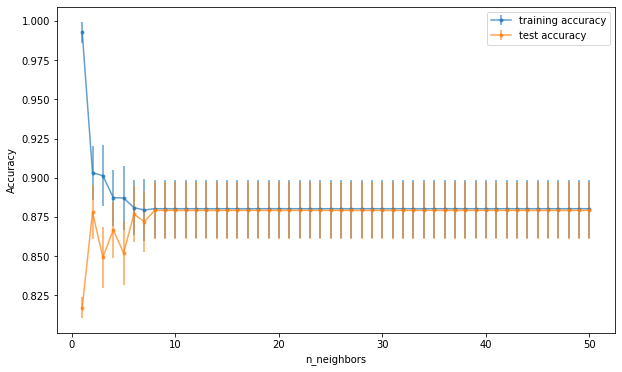

In [7]:
features = df[column_names[:-1]]
target = df[column_names[-1]]
plot_accuracy(features, target)

We can observe that at around 2-3 n_neighbors, standard deviations of the training and test accuracy values begin to overlap signaling that the mean difference is approaching insignificance. At higher n_values (> 10) the overlap becomes more consistent and prominent.

Looking closely, a plot for the first 10 n_neighbers is shown below.

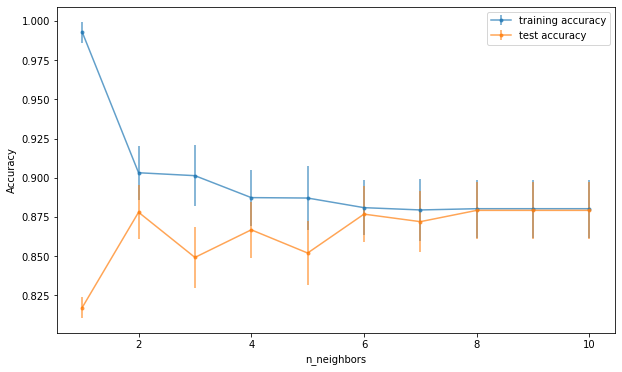

In [8]:
plot_accuracy(features, target, n_neighbors=10)

From these results, **we chose k = 7 nearest neighbors** for the KNN implementation below to show the exact test and train accuracy values for a random trial. However, it can be seen from the plots that **any choice of k beyond that until k = 50 will still yield a desired accuracy above 80%**

In [9]:
# Split train-test 75-25
feat_train, \
feat_test, \
target_train, \
target_test = train_test_split(features, target, test_size=0.25)

# Implement KNN and print accuracies
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(feat_train, target_train)
training_acc = clf.score(feat_train, target_train)
test_acc = clf.score(feat_test, target_test)
print(f"Training Accuracy at 7 nearest neighbors: {training_acc}")
print(f"Test Accuracy at 7 nearest neighbors: {test_acc}")

Training Accuracy at 7 nearest neighbors: 0.88
Test Accuracy at 7 nearest neighbors: 0.88


From one random trial above, we can observe that **the accuracies are already  much higher than the PCC=0.7888**. Replicating this result in more random trials at k = 7 will continue to yield accuracy values within the standard deviation shown in the plots above. These values are well above the target of 80% accuracy of the classifier. 

Our group observed that the 1.25Pcc is unbeatable using the original dataset. Thus in the section **KNN Classification with Oversampling** below we employed other methods to try to beat the 1.25Pcc.

### Sensitivity Analysis

#### Approach A: Individual KNNs for each Feature
To determine the impact of each feature to our model, we conducted a sensitivity analysis by performing individual KNNs (one for each feature-target pair) and solved for the accuracy scores using the `cross_val_score()` funtion. The results are shown below.

In [10]:
clf = KNeighborsClassifier()
feature_names = column_names
feature_count = len(column_names) - 1
y = df[column_names[-1]]
print('Feature\t\tAccuracy')

for i in range(feature_count):
    X = df.iloc[:, i]
    X = np.array(X).reshape(X.shape[0], 1)
    scores = cross_val_score(clf, X, y)
    print(f'{i} : {scores.mean():.2f}\t{feature_names[i]}')

Feature		Accuracy
0 : 0.69	season
1 : 0.84	age
2 : 0.88	childish_disease
3 : 0.80	Acc_trauma
4 : 0.88	surgical_int
5 : 0.88	high_fevers
6 : 0.76	alcohol_freq
7 : 0.88	smoking
8 : 0.78	sitting_hours


#### Approach B: Accuracy dips
Another approach to this sensitivity analysis is **by investigating on accuracy dips as we remove features on by one**.

In [11]:
clf = KNeighborsClassifier()
feature_names = column_names
feature_count = len(column_names) - 1
y = df[column_names[-1]]
print('Accuracy\tFeature removed')

for i in range(feature_count):
    X1 = np.atleast_2d(df[column_names[:i]])
    X2 = np.atleast_2d(df[column_names[i+1:-1]])
    X = np.hstack((X1, X2))
    scores = cross_val_score(clf, X, y)
    print(f'{i} : {scores.mean():.2f}\t{feature_names[i]}')

Accuracy	Feature removed
0 : 0.88	season
1 : 0.83	age
2 : 0.88	childish_disease
3 : 0.81	Acc_trauma
4 : 0.87	surgical_int
5 : 0.83	high_fevers
6 : 0.83	alcohol_freq
7 : 0.84	smoking
8 : 0.82	sitting_hours


This sensitivity analysis can now be a basis on which features are least impactful as predictor in the classification. For example, in the case of our dataset, the feature 'season' showed a very low score on the sensitivity analysis thus functioning as a 'weaker' predictor.

Remarkable differences among accuracies of each feature can be seen in the **Approach A** are:
* Sitting hours is shown to have a higher accuracy in predicting fertility in men than alcohol consumption
* Smoking ranked as high as other medical conditions in terms of its accuracy in prediciting fertility in men.

## KNN Classification with Oversampling

In [12]:
df_sample = df.loc[df['target'] == 'O'].sample(72, random_state=1, replace=True)
df_oversampled = df.append(df_sample)
df_oversampled.shape

(172, 10)

In [13]:
target = df_oversampled['target']
features = df_oversampled[column_names[:-1]]

In [14]:
target.value_counts()

N    88
O    84
Name: target, dtype: int64

In [15]:
r, cnt = np.unique(target, return_counts=True)
pcc = sum([(c/len(target)) ** 2 for c in cnt])
print('PCC is ', pcc)
print('Accuracy to beat* is ', pcc * 1.25)
print('*based on 1.25Pcc')

PCC is  0.5002704164413196
Accuracy to beat* is  0.6253380205516496
*based on 1.25Pcc


### Plot the accuracy of training and test dataset

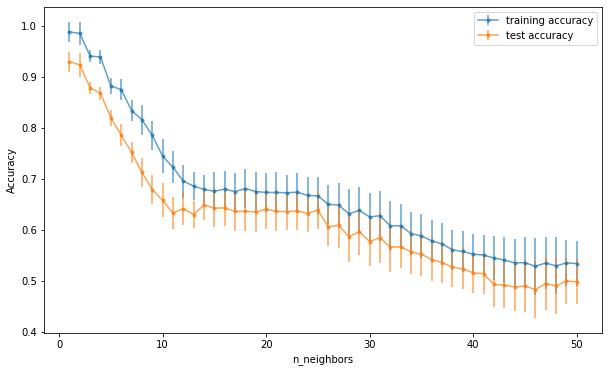

In [16]:
plot_accuracy(features, target, n_neighbors=50)

Our oversampling approach was effective in reducing the Pcc and 1.25Pcc values of the **new dataset**. **However, we have reservations to the validity of our approach** since the observed plot here no longer follows the behavior shown in the other plots above. Specifically, the cost of beating the 1.25Pcc  is drastically lower accuracy (< 80%). The technique we employed thus requires further improvement and scrutiny.

## Discussion of Results

From the sensitivity analysis, it can be seen that the following features are most correlated to the male infertility:

1. **Smoking.** Several studies have linked tobacco to be correlated with decreased sperm concentration, decreased motility, fewer normally shaped sperm, and increased sperm DNA damage. This is reflected on the model wherein the infertility is sensitive to smoking features of the dataset. [verywellfamily.com](https://www.verywellfamily.com/male-fertility-and-smoking-1960256)

2. **Childish Disease.** Some childish diseases (such as mumps, chicken pox) can cause orchitis later in adulthood that are known to impair the sperm production in the testis. [healthline.com](https://www.healthline.com/health/orchitis)

3. **High fevers.** It is shown that the testicles is held further away from the body to regulate its temperature. However, in times when the testicles cannot maintain this ideal temperature (during high fevers), sperm production can stop or be hindered for a short time. [txfertility.com](https://txfertility.com/the-sperm-cycle-i-got-a-fever-and-the-only-prescription-is/)
    
4. **Surgical intervention.** Surgical interventions on the reproductive parts have also shown to have high sensitivity on the sample dataset. However, there have been no definitive studies that might correlate surgeries with male infertility. This might necessitate to have further researches. 

It was also found that the male infertility are less sensitive to the following features:
1. **Age.** While it is known that male can still bear children even at an older age, a greater age reduces the overall chances of pregnancy due to sperm quality decreases. [betterhealth.gov](https://www.betterhealth.vic.gov.au/health/conditionsandtreatments/age-and-fertility#:~:text=Male%20fertility%20generally%20starts%20to,of%20miscarriage%20and%20fetal%20death.)

2. **Number of hours sitting.** Increased number of hours sitting have a higher risk of Oligospermia which is a male fertility issue characterized by a low sperm production. This is correlated to the increased temperature of the scrotum when sitting on extended period of hours. [consumer.healthday.com](https://consumer.healthday.com/encyclopedia/fertility-19/infertility-news-412/lifestyle-and-fertility-643329.html)

3. **Alcohol consumption.** Temporary decreases in sperm counts and testosterone levels have been correlated to increased alcohol consumption. The good news is that the effects are reversible once alcohol consumption stops. [healthline.com](https://www.healthline.com/health/does-alcohol-kill-sperm-2#effect-on-male-fertility)
   
4. **Accidental Trauma.** Serious accidents and traumas (but non testicular trauma are used in the dataset) also have less sensitivity to male infertility. There are also no insightful papers that can confirm trauma as contributory to sperm production and should be further researched.
  
5. **Season/ time of year.** It was found that men with normal sperm production had the better sperm (in terms of swimming speed and quality) in the winter compared to other seasons of the year. [reuters.com](https://www.reuters.com/article/us-sperm/even-for-sperm-there-is-a-season-idUSBRE9290IW20130310#:~:text=(Reuters)%20%2D%20Autumn%20is%20the,in%20winter%20and%20early%20spring.)

Reference:
1. Fertility Dataset; UCI Machine Learning Repository; https://archive.ics.uci.edu/ml/datasets/Fertility
2. "Semen Parameters can be Predicted from Environmental Factors and Lifestyle using Aritificial Intelligence Methods" by: Jose L. Girela1, David Gil2, Magnus Johnsson, María José Gomez-Torres, and Joaquín De Juan

In [17]:
# create HTML version of this notebook
!jupyter nbconvert "The Winner Swimmer.ipynb" --no-prompt

[NbConvertApp] Converting notebook The Winner Swimmer.ipynb to html
[NbConvertApp] Writing 370528 bytes to The Winner Swimmer.html
